In [37]:
import csv

# name.csv ниже нужно заменить на название csv файла, который вы хотите открыть

with open('click_stream.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    
    i=0 # счетчик для отладки
    c1=0; c2=0; c3=0; c4=0
    for row in csv_reader:
        i += 1
        ty = row['1_home_page']
        if ty[0]=='1':
            c1 += 1
        elif ty[0]=='2':
            c2 += 1
        elif ty[0]=='3':
            c3 += 1
        elif ty[0]=='4':
            c4 += 1
#         if i==10:
#             break

print(c1, c2, c3, c4)

90399 45200 6030 452


In [68]:
# а теперь используем более подходящие инструменты
import pandas as pd

csv_data = pd.read_csv('click_stream.csv', names=['user_id', 'page', 'event_date'], parse_dates=True)
csv_data

,user_id,page,event_date
0,313593,1_home_page,2015-02-26
1,468315,1_home_page,2015-02-21
2,264005,1_home_page,2015-03-25
3,290784,1_home_page,2015-03-14
4,639104,1_home_page,2015-01-03
...,...,...,...
142077,397473,4_payment_confirmation_page,2015-01-12
142078,860829,4_payment_confirmation_page,2015-02-07
142079,371291,4_payment_confirmation_page,2015-02-17
142080,263707,4_payment_confirmation_page,2015-03-20


In [69]:
result = csv_data.groupby('page')['user_id'].count()
result

page
1_home_page                    90400
2_search_page                  45200
3_payment_page                  6030
4_payment_confirmation_page      452
Name: user_id, dtype: int64

In [64]:
print(f'В итоге сделали заказ, из числа первоначальных посетителей: {round(result[3]/result[0]*100, 2)}%')

В итоге сделали заказ, из числа первоначальных посетителей: 0.5%


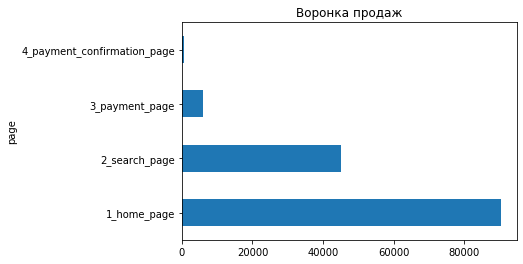

In [70]:
result.plot.barh(title='Воронка продаж');